## Bayesian Method for Exploit-Explore Problem

- instead of playing slot machine one at a time
- on each round we rank each bandit according to samples from their posterior
- model each slot machine as a separate Beta distribution, i.e. model each machine's win rate
- draw a sample from each Beta distribution and sort them in order, i.e. the ranking
- pick top item from ranked list, and play that slot machine
- this is analagous to (CTR) clicks/impressions on a website
- Bayesian approach lets us treat click through rate measurements as random variables,
- and explore-exploit is handled by random variables

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [3]:
class Bandit(object):
  def __init__(self, p):
    self.p = p
    self.a = 1
    self.b = 1

  def pull(self):
    return np.random.random() < self.p

  def sample(self):
    return np.random.beta(self.a, self.b)

  def update(self, x):
    self.a += x
    self.b += 1 - x


def plot(bandits, trial):
  x = np.linspace(0, 1, 200)
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y, label='real p: %.4f' % b.p)
  plt.title('Bandit distributions after %s trials' % trial)
  plt.legend()
  plt.show()

def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 1999]

  for i in range(NUM_TRIALS):
    bestb = None
    maxsample = -1
    allsamples = []
    for b in bandits:
      sample = b.sample()
      allsamples.append('%.4f' % sample)
      if sample > maxsample:
        maxsample = sample
        bestb = b
    if i in sample_points:
      print('current samples: %s' % allsamples)
      plot(bandits, i)

    x = bestb.pull()
    bestb.update(x)

current samples: ['0.3260', '0.2359', '0.8346']


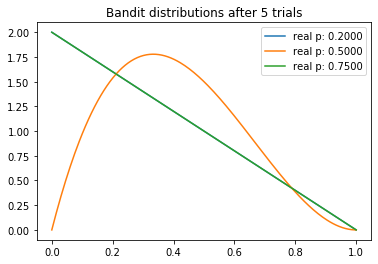

current samples: ['0.0057', '0.3723', '0.0160']


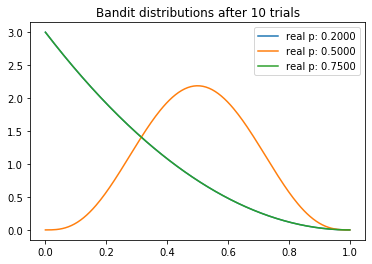

current samples: ['0.5576', '0.6959', '0.4918']


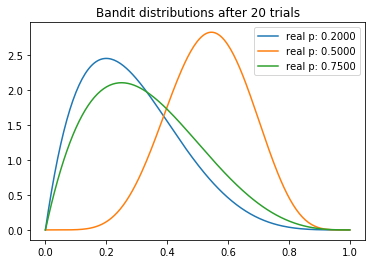

current samples: ['0.2300', '0.5487', '0.6393']


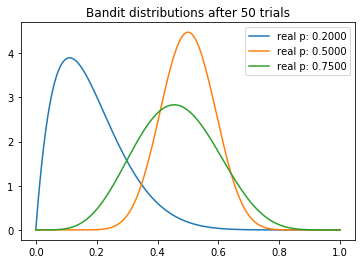

current samples: ['0.0286', '0.5113', '0.6657']


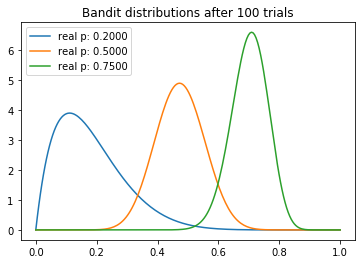

current samples: ['0.0668', '0.4711', '0.7406']


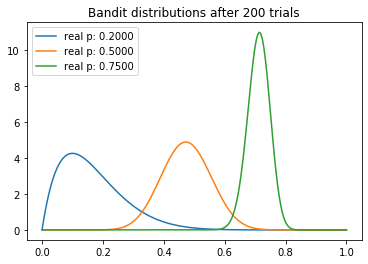

current samples: ['0.0722', '0.6293', '0.7360']


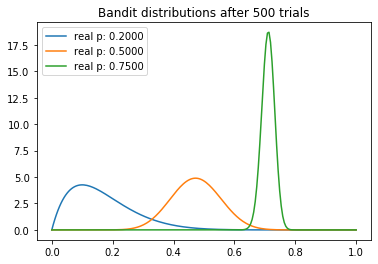

current samples: ['0.2483', '0.4353', '0.7042']


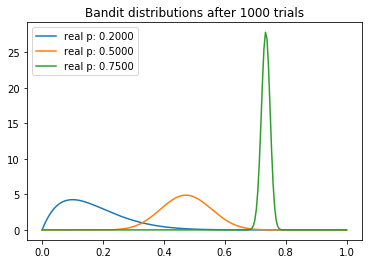

current samples: ['0.1081', '0.5063', '0.7486']


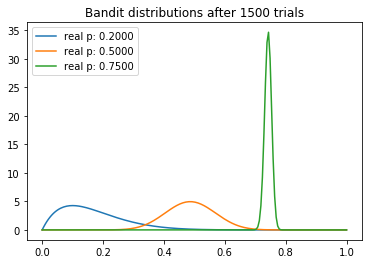

current samples: ['0.1646', '0.5434', '0.7477']


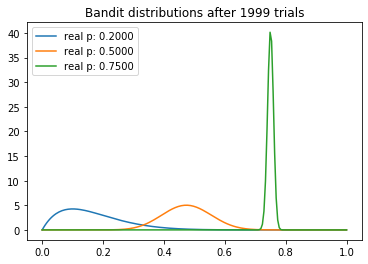

In [4]:
experiment();